In [6]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
df = pd.read_csv("student_learning_dataset.csv")
print("Shape:", df.shape)
df.head()

Shape: (180662, 24)


,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,...,id_assessment,date_submitted,is_banked,score,assessment_type,date,weight,total_clicks,avg_clicks,total_vle_interactions
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,...,1752.0,18.0,0.0,78,TMA,19.0,10.0,934.0,4.765306,196.0
1,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,...,1753.0,53.0,0.0,85,TMA,54.0,20.0,934.0,4.765306,196.0
2,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,...,1754.0,115.0,0.0,80,TMA,117.0,20.0,934.0,4.765306,196.0
3,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,...,1755.0,164.0,0.0,85,TMA,166.0,20.0,934.0,4.765306,196.0
4,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,...,1756.0,212.0,0.0,82,TMA,215.0,30.0,934.0,4.765306,196.0


In [ ]:
# info
df.info()

# statistics
df.describe()

# missing values
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180662 entries, 0 to 180661
Data columns (total 24 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   code_module             180662 non-null  object 
 1   code_presentation       180662 non-null  object 
 2   id_student              180662 non-null  int64  
 3   gender                  180662 non-null  object 
 4   region                  180662 non-null  object 
 5   highest_education       180662 non-null  object 
 6   imd_band                180662 non-null  object 
 7   age_band                180662 non-null  object 
 8   num_of_prev_attempts    180662 non-null  int64  
 9   studied_credits         180662 non-null  int64  
 10  disability              180662 non-null  object 
 11  final_result            180662 non-null  object 
 12  date_registration       180662 non-null  object 
 13  date_unregistration     180662 non-null  object 
 14  id_assessment       

code_module                  0
code_presentation            0
id_student                   0
gender                       0
region                       0
highest_education            0
imd_band                     0
age_band                     0
num_of_prev_attempts         0
studied_credits              0
disability                   0
final_result                 0
date_registration            0
date_unregistration          0
id_assessment             6750
date_submitted            6750
is_banked                 6750
score                     6750
assessment_type           6750
date                      6750
weight                    6750
total_clicks              3483
avg_clicks                3483
total_vle_interactions    3483
dtype: int64

In [4]:
# separate types
num_cols = df.select_dtypes(include=['int64','float64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

# fill numeric NA
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

# fill categorical NA
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [21]:
from sklearn.preprocessing import LabelEncoder
# convert mixed types to string
le = LabelEncoder()

for col in cat_cols:
    df[col] = df[col].astype(str)     
    df[col] = le.fit_transform(df[col])

In [ ]:
# getting target variable
df['passed'] = df['score'].apply(lambda x: 1 if x >= 40 else 0)

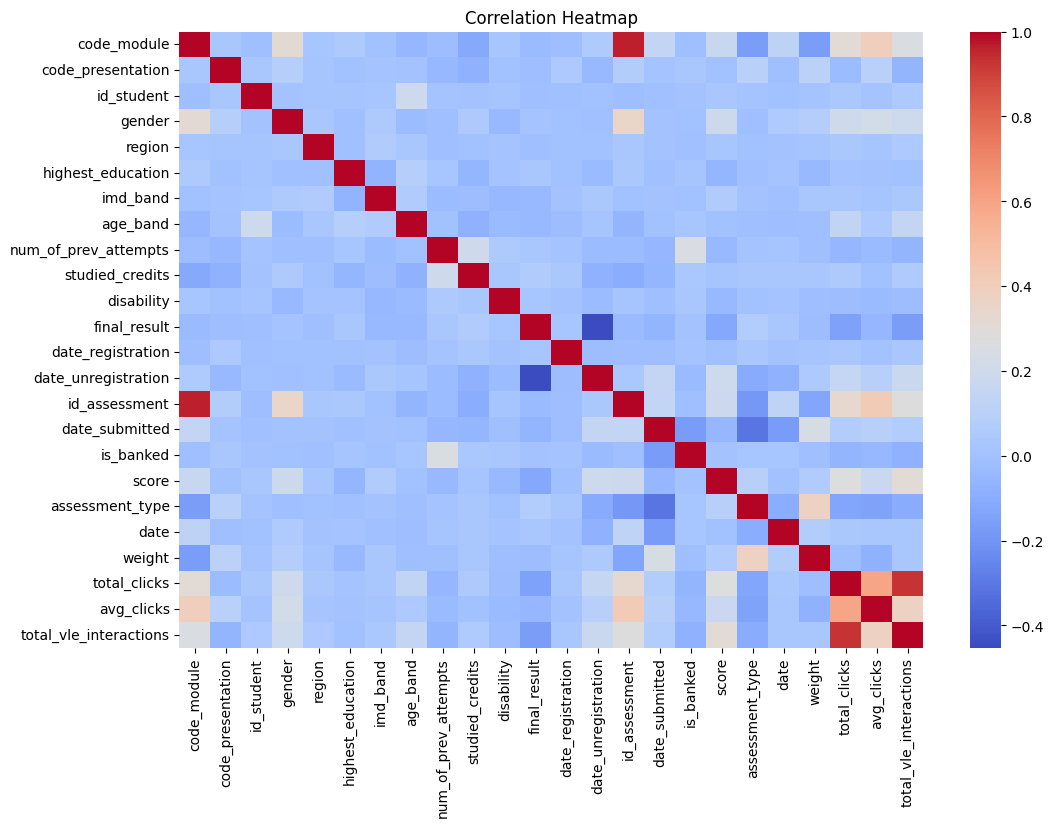

In [10]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap")
plt.show()

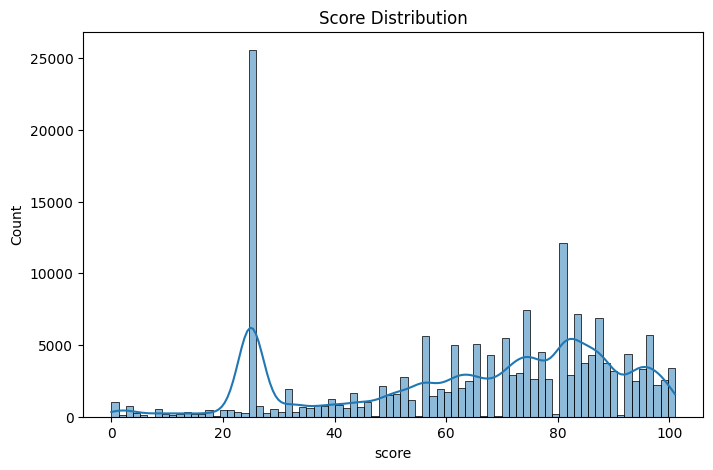

In [11]:
plt.figure(figsize=(8,5))
sns.histplot(df['score'], kde=True)
plt.title("Score Distribution")
plt.show()

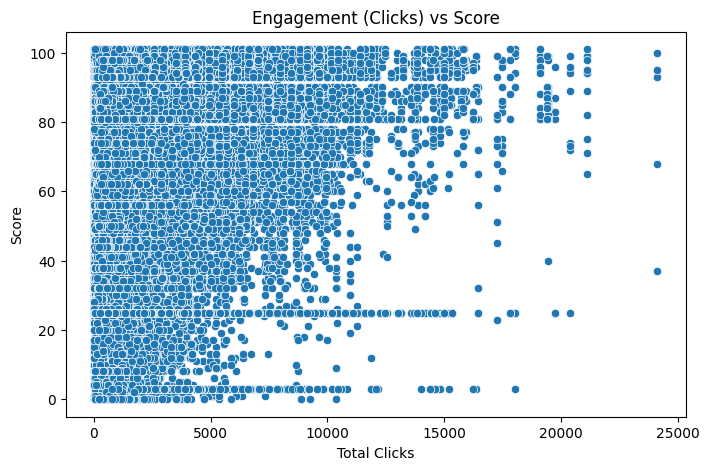

In [12]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['total_clicks'], y=df['score'])
plt.title("Engagement (Clicks) vs Score")
plt.xlabel("Total Clicks")
plt.ylabel("Score")
plt.show()

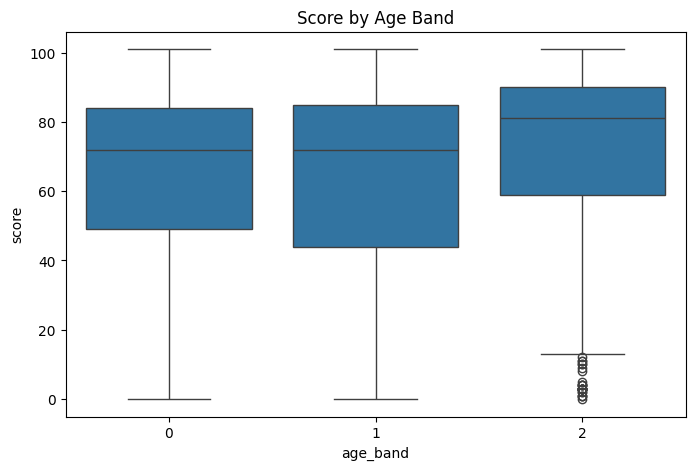

In [13]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df['age_band'], y=df['score'])
plt.title("Score by Age Band")
plt.show()

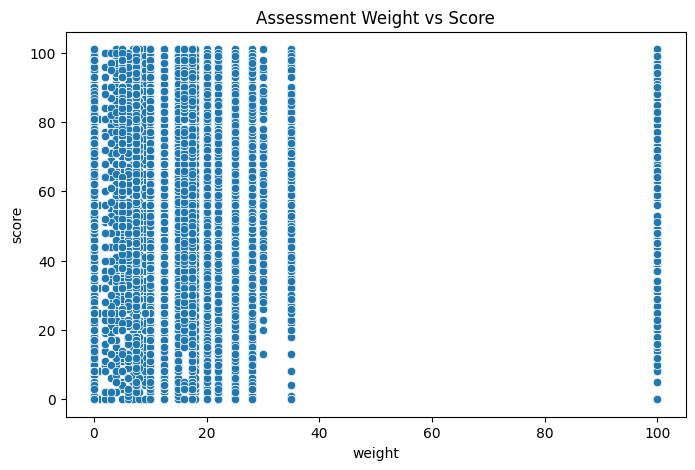

In [15]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['weight'], y=df['score'])
plt.title("Assessment Weight vs Score")
plt.show()

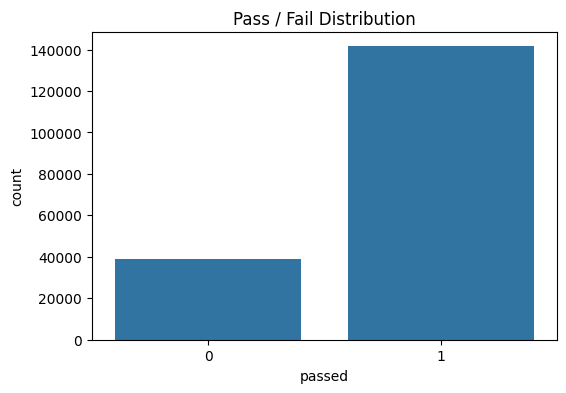

In [17]:
plt.figure(figsize=(6,4))
sns.countplot(x=df['passed'])
plt.title("Pass / Fail Distribution")
plt.show()

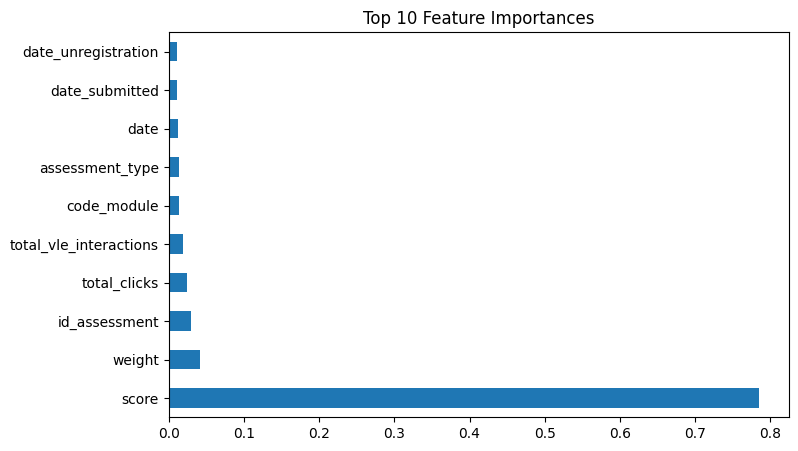

In [18]:
from sklearn.ensemble import RandomForestClassifier

X = df.drop('passed', axis=1)
y = df['passed']

rf = RandomForestClassifier()
rf.fit(X, y)

feat_importance = pd.Series(rf.feature_importances_, index=X.columns)
feat_importance.nlargest(10).plot(kind='barh', figsize=(8,5))
plt.title("Top 10 Feature Importances")
plt.show()